In [1]:
import numpy as np
import matplotlib.pyplot as plt
import access_spectrum as acs
from empca_residuals import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
import matplotlib
font = {'family': 'serif',
        'weight': 'normal',
        'size'  :  20 # Tune this according to personal preference
}

matplotlib.rc('font',**font)

default_cmap = 'plasma'
colours = plt.get_cmap('plasma')(np.linspace(0,0.80,4))

In [23]:
rg = empca_residuals('apogee','red_giant',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done
Done getting filter information


In [7]:
n6819 = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done
Done getting filter information


In [9]:
n2158 = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N2158
Data key: done
Done getting filter information


In [11]:
m67 = empca_residuals('apogee','clusters',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: M67
Data key: done
Done getting filter information


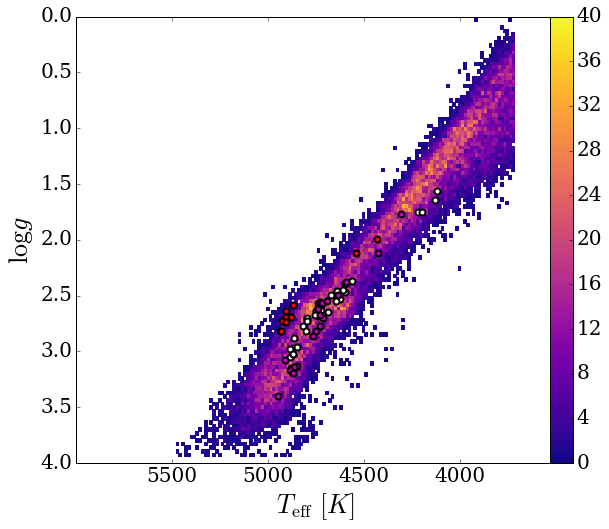

In [17]:
def hist2d(fig,ax,x,y,bins=100,clabel=False,vmin=0,vmax=110):
    H,xedges,yedges = np.histogram2d(x,y,bins=bins)
    # Reorient appropriately
    H = np.rot90(H)
    H = np.flipud(H)
    Hmasked = np.ma.masked_where(H==0,H)
    im = ax.pcolormesh(xedges,yedges,Hmasked,
                   cmap = plt.get_cmap(default_cmap),
                   vmin=vmin,vmax=vmax)
    if clabel:
        cbar=fig.colorbar(im,pad = -0.01)
        cbar.set_label(label=clabel,fontsize=20)
        cbar.ax.tick_params(labelsize=20)
    elif not clabel:
        cbar=fig.colorbar(im,pad = -0.01)
        cbar.ax.tick_params(labelsize=20)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
hist2d(fig,ax,rg.teff,rg.logg,bins=120,vmax=40)
plt.plot(n6819.teff,n6819.logg,'o',markeredgecolor='k',markerfacecolor='w',markeredgewidth=2)
plt.plot(n2158.teff,n2158.logg,'o',markeredgecolor='k',markerfacecolor='r',markeredgewidth=2)
plt.plot(m67.teff,m67.logg,'o',markeredgecolor='k',markerfacecolor='m',markeredgewidth=2)
plt.ylim(4,0)
plt.xlim(6000,3500)
plt.xticks(np.arange(4000,6000,500)[::-1],fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$\log g$',fontsize=26)
plt.xlabel(r'$T_{\mathrm{eff}}\,\,[K]$',fontsize=26)
#plt.axhline(2,color='r',ls='--',lw=2)
#plt.axhline(3,color='r',ls='--',lw=2)
#plt.axhline(4,color='r',ls='--',lw=2)
#plt.fill_between(np.arange(3500,6100,100),4,2,alpha=0.1,color='r')
#plt.axvline(4700,color='k',ls='--',lw=2)
#plt.axvline(4900,color='k',ls='--',lw=2)
#plt.fill_between(np.arange(4700,5000,100),4,0,alpha=0.1,color='k')

In [21]:
np.max(np.concatenate((n6819.logg,n2158.logg,m67.logg))),np.min(np.concatenate((n6819.logg,n2158.logg,m67.logg)))

(3.3999999999999999, 1.5600000000000001)

In [22]:
np.max(np.concatenate((n6819.teff,n2158.teff,m67.teff))),np.min(np.concatenate((n6819.teff,n2158.teff,m67.teff)))

(4948.5, 4118.5)

In [24]:
rglim = empca_residuals('apogee','red_giant',maskFilter,ask=True,degree=2)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: LOGG
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 3.4
Lower limit (Enter for minimum): 1.5
Found good limits
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 4950
Lower limit (Enter for minimum): 4100
Found good limits
Data key: done


Done getting filter information
Total 0 of 14226 stars missing


In [ ]:
rglim.findResiduals(gen=False)

In [ ]:
nvecs=60
minsnr=50
rglim.pixelEMPCA(nvecs=nvecs,mad=True,
                savename='eig{0}_minSNR{1}_corrNone_madTrue.pkl'.format(nvecs,minsnr))

       iter        R2             rchi2
EMPCA  1/25       0.06135892    801.80280008
EMPCA  2/25       0.96872574      7.58498644
EMPCA  3/25       0.98668878      2.53393018
EMPCA  4/25       0.98836729      2.16899323
EMPCA  5/25       0.98935766      1.92817161
EMPCA  6/25       0.99030625      1.74942737
EMPCA  7/25       0.99085155      1.66286550
EMPCA  8/25       0.99113382      1.61968373
EMPCA  9/25       0.99125522      1.60129993
EMPCA 16/25       0.99143701      1.57382624
EMPCA 17/25       0.99144466      1.57267192
